In [1]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sb

## Step 1: Data Exploration

In [3]:
# Loading the dataset
file_path = r"c:\Users\divya\OneDrive\Documents\Desktop\Airbnb Analysis\data\listings.csv"
df = pd.read_csv(file_path)

In [4]:
# Display the first few rows
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,37380,https://www.airbnb.com/rooms/37380,20241107055258,2024-11-07,city scrape,Handy to Brisbane Airport,NaN,Wavell Heights is an older well established ne...,https://a0.muscache.com/pictures/airflow/Hosti...,161432,...,5.00,4.93,4.91,NaN,f,2,2,0,0,0.39
1,277913,https://www.airbnb.com/rooms/277913,20241107055258,2024-11-07,city scrape,"SELF-CONTAINED APART., SOLAR,WI-FI,SHOPPING CE...","One kitchen/living room, a bathroom with toile...",Huge shopping center only 2 mn walk. Holmead P...,https://a0.muscache.com/pictures/miso/Hosting-...,1450636,...,4.86,4.81,4.69,NaN,t,1,1,0,0,1.03
2,325029,https://www.airbnb.com/rooms/325029,20241107055258,2024-11-07,city scrape,Sunny Home - 2 Bed & Deck,Welcome to our cozy Sunny Home on a quiet West...,West End's renowned Boundary St is Brisbane's ...,https://a0.muscache.com/pictures/prohost-api/H...,1564865,...,4.95,4.91,4.81,NaN,f,2,2,0,0,1.84
3,468726,https://www.airbnb.com/rooms/468726,20241107055258,2024-11-07,city scrape,"Near the city By the river Close to UQ, Milton",Our large air-con fully equipped two-bedroom a...,Guests at our Suncorp Stadium accommodation en...,https://a0.muscache.com/pictures/6664180/c0516...,2318421,...,4.85,4.80,4.60,NaN,f,4,4,0,0,0.16
4,469007,https://www.airbnb.com/rooms/469007,20241107055258,2024-11-07,city scrape,Nice Room in Large Homely Residence,NaN,NaN,https://a0.muscache.com/pictures/7102919/034d3...,2328120,...,4.98,4.76,4.80,NaN,f,1,0,1,0,0.37


In [5]:
# Check dataset info
df.info

<bound method DataFrame.info of                        id                                       listing_url  \
0                   37380                https://www.airbnb.com/rooms/37380   
1                  277913               https://www.airbnb.com/rooms/277913   
2                  325029               https://www.airbnb.com/rooms/325029   
3                  468726               https://www.airbnb.com/rooms/468726   
4                  469007               https://www.airbnb.com/rooms/469007   
...                   ...                                               ...   
5112  1283499495341137661  https://www.airbnb.com/rooms/1283499495341137661   
5113  1283583300662296708  https://www.airbnb.com/rooms/1283583300662296708   
5114  1283730685988503652  https://www.airbnb.com/rooms/1283730685988503652   
5115  1283734422791544759  https://www.airbnb.com/rooms/1283734422791544759   
5116  1283742495770800473  https://www.airbnb.com/rooms/1283742495770800473   

           scrape_i

In [6]:
# Basic statistics
df.describe

<bound method NDFrame.describe of                        id                                       listing_url  \
0                   37380                https://www.airbnb.com/rooms/37380   
1                  277913               https://www.airbnb.com/rooms/277913   
2                  325029               https://www.airbnb.com/rooms/325029   
3                  468726               https://www.airbnb.com/rooms/468726   
4                  469007               https://www.airbnb.com/rooms/469007   
...                   ...                                               ...   
5112  1283499495341137661  https://www.airbnb.com/rooms/1283499495341137661   
5113  1283583300662296708  https://www.airbnb.com/rooms/1283583300662296708   
5114  1283730685988503652  https://www.airbnb.com/rooms/1283730685988503652   
5115  1283734422791544759  https://www.airbnb.com/rooms/1283734422791544759   
5116  1283742495770800473  https://www.airbnb.com/rooms/1283742495770800473   

           scrape

# Step 2: Data Cleaning 

In [7]:
# select relevent columns
columns = ['id', 'name', 'neighbourhood', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']
df = df[columns]

In [8]:
# Handle missing values
df.dropna(inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_5272\1847245051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
# Convert price to numeric
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\divya\AppData\Local\Temp\ipykernel_5272\3551065662.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\divya\AppData\Local\Temp\ipykernel_5272\3551065662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_5272\2465174404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [11]:
# Check the cleaned dataset
print(df.head())

       id                                               name  \
0   37380                          Handy to Brisbane Airport   
1  277913  SELF-CONTAINED APART., SOLAR,WI-FI,SHOPPING CE...   
2  325029                          Sunny Home - 2 Bed & Deck   
3  468726     Near the city By the river Close to UQ, Milton   
6  500965           FAMILY 3-bedroom Brisbane City Apartment   

             neighbourhood  price  minimum_nights  number_of_reviews  \
0  Neighborhood highlights  230.0               3                 56   
1  Neighborhood highlights   70.0               5                157   
2  Neighborhood highlights  281.0               2                197   
3  Neighborhood highlights  234.0               2                 23   
6  Neighborhood highlights  426.0               4                125   

   availability_365  
0               316  
1               219  
2                81  
3               350  
6                78  


# Step 3: Analyse the data

In [12]:
# Average price by neighborhood
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
print(avg_price)

# Correlation between reviews and price
correlation = df[['number_of_reviews', 'price']].corr()
print(correlation)

# Most available neighborhoods
availability = df.groupby('neighbourhood')['availability_365'].sum().sort_values(ascending=False)
print(availability)

neighbourhood
Neighborhood highlights    239.623296
Name: price, dtype: float64
                   number_of_reviews     price
number_of_reviews           1.000000 -0.116823
price                      -0.116823  1.000000
neighbourhood
Neighborhood highlights    491684
Name: availability_365, dtype: int64


# Step 4: Visualize the Insights

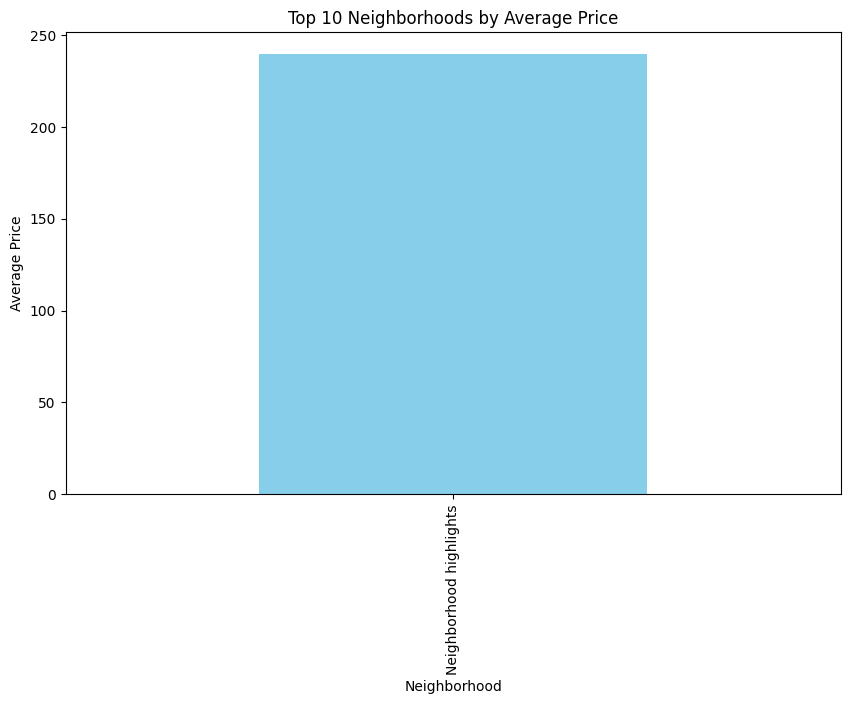

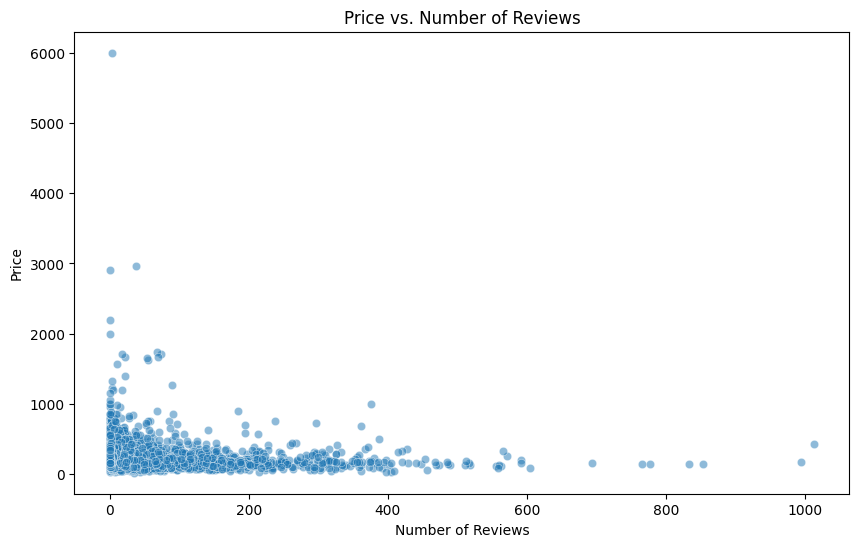

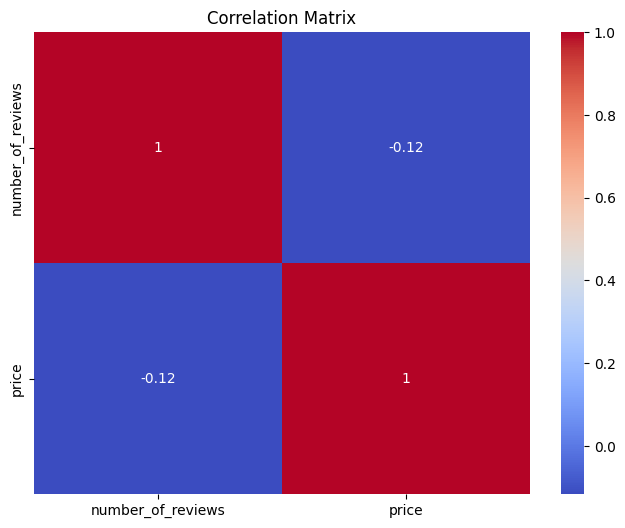

In [13]:
import matplotlib.pyplot as plt

# Average price by neighborhood (Top 10)
avg_price.nlargest(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.savefig(r'C:\Users\divya\OneDrive\Documents\Desktop\Airbnb Analysis\outputs\visualizations\avg_price_neighborhood.png')
plt.show()

# Scatter plot: Price vs. Number of reviews
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.savefig(r'C:\Users\divya\OneDrive\Documents\Desktop\Airbnb Analysis\outputs\visualizations\price_vs_reviews.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig(r'C:\Users\divya\OneDrive\Documents\Desktop\Airbnb Analysis\outputs\visualizations\correlation_matrix.png')
plt.show()

# Step 5: Save and Document

In [14]:
# Export cleaned data
df.to_csv('C:\\Users\\divya\\OneDrive\\Documents\\Desktop\\Airbnb Analysis\\outputs\\cleaned_listings.csv', index=False)


Data Exploration

In [15]:
df.describe()

,id,price,minimum_nights,number_of_reviews,availability_365
count,2.567000e+03,2567.000000,2567.000000,2567.000000,2567.000000
mean,5.355161e+17,239.623296,4.377873,69.885469,191.540319
std,4.933385e+17,226.665923,15.019985,99.279058,121.295324
min,3.738000e+04,20.000000,1.000000,0.000000,0.000000
25%,3.864346e+07,139.500000,1.000000,10.000000,77.000000
50%,6.880855e+17,193.000000,2.000000,34.000000,172.000000
75%,1.008743e+18,271.000000,3.000000,87.500000,320.000000
max,1.283731e+18,6000.000000,500.000000,1013.000000,365.000000


In [16]:
# Checking for any missing values
df.isnull().sum()

id                   0
name                 0
neighbourhood        0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
dtype: int64

In [17]:
# Verifying the datatypes
df.dtypes

id                     int64
name                  object
neighbourhood         object
price                float64
minimum_nights         int64
number_of_reviews      int64
availability_365       int64
dtype: object

In [18]:
!pip install flask

In [19]:
from flask import Flask, render_template
import pandas as pd
from threading import Thread

app = Flask(__name__)

@app.route('/')
def index():
    df = pd.read_csv('C:\\Users\\divya\\OneDrive\\Documents\\Desktop\\Airbnb Analysis\\outputs\\cleaned_listings.csv')  # the cleaned data
    data = df.head()  
    return render_template('index.html', data=data)

def run_flask():
    app.run(debug=True, use_reloader=False)  # Set use_reloader=False to avoid issues

# Run Flask app in a separate thread
thread = Thread(target=run_flask)
thread.start()

 * Serving Flask app '__main__'


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Jan/2025 17:45:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 17:45:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 17:45:06] "GET / HTTP/1.1" 200 -
